### Data Integrity Review for Sector II

This area presents a particularly useful characteristic for analysis: it is a purely residential sector with assembled neighborhoods (some already inhabited locally, others constructed). There is almost no commercial presence, and the plots, streets, sidewalks, and public spaces are very limited.

-----------------------------------------------------------------------------------------------------------------------

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'crimes_csv/zone_ii_crimes_locations.csv'
df = pd.read_csv(file_path, delimiter=',')

print(df.head())

         name  armed robbery  car theft  snatch theft  minor injuries  \
0  complaint1              0          0             0               2   
1  complaint2              0          0             0               0   
2  complaint3              0          2             0               1   
3  complaint4              0          1             0               2   
4  complaint5              0          1             0               0   

   robbery  serious injuries  theft  vandalism        date   latitude  \
0        1                 2      1          0  21/07/2021 -31.436496   
1        0                 1      0          2  09/09/2010 -31.444567   
2        1                 2      2          1  09/02/2013 -31.443291   
3        1                 2      2          2  23/06/2013 -31.433993   
4        0                 0      0          0  28/02/2016 -31.442929   

   longitude  
0 -64.245142  
1 -64.243066  
2 -64.248005  
3 -64.244092  
4 -64.246595  


In [6]:
nan_null_count = df.isnull().sum()
print("Count of NaN or null values per column:")
print(nan_null_count)

columns_all_zero = [col for col in df.columns if (df[col] == 0).all()]
print("\nColumns with all values equal to 0:")
print(columns_all_zero)

Count of NaN or null values per column:
name                0
armed robbery       0
car theft           0
snatch theft        0
minor injuries      0
robbery             0
serious injuries    0
theft               0
vandalism           0
date                0
latitude            0
longitude           0
dtype: int64

Columns with all values equal to 0:
['armed robbery', 'snatch theft']


-----------------------------------------------------------------------------------------------------------------------

As previously mentioned, *IF WE WANTED TO REVIEW THE ACTUAL DATA* (the data used here is modified for legal reasons and as an example replicating the problem), it is important to evaluate if there is a totality of "0" values. Referring to the criminal data loading system of some Argentine provinces, this would imply that we made a mistake when consulting the prosecutor's office, UJ, or the police data storage system.

-----------------------------------------------------------------------------------------------------------------------

In [7]:
columns_to_exclude = ['name', 'date', 'latitude', 'longitude']
columns_to_consider = [col for col in df.columns if col not in columns_to_exclude]

columns_with_non_zero_data = [col for col in columns_to_consider if (df[col] != 0).any()]

df_with_non_zero_data = df[columns_with_non_zero_data]

descriptive_statistics = df_with_non_zero_data.describe(include='all')

print("\nDescriptive statistics of columns with non-zero values:")
print(descriptive_statistics)


Descriptive statistics of columns with non-zero values:
        car theft  minor injuries     robbery  serious injuries       theft  \
count  400.000000      400.000000  400.000000         400.00000  400.000000   
mean     0.940000        1.002500    0.975000           0.99250    0.995000   
std      0.808104        0.796291    0.834335           0.80253    0.828669   
min      0.000000        0.000000    0.000000           0.00000    0.000000   
25%      0.000000        0.000000    0.000000           0.00000    0.000000   
50%      1.000000        1.000000    1.000000           1.00000    1.000000   
75%      2.000000        2.000000    2.000000           2.00000    2.000000   
max      2.000000        2.000000    2.000000           2.00000    2.000000   

        vandalism  
count  400.000000  
mean     0.932500  
std      0.802842  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000  


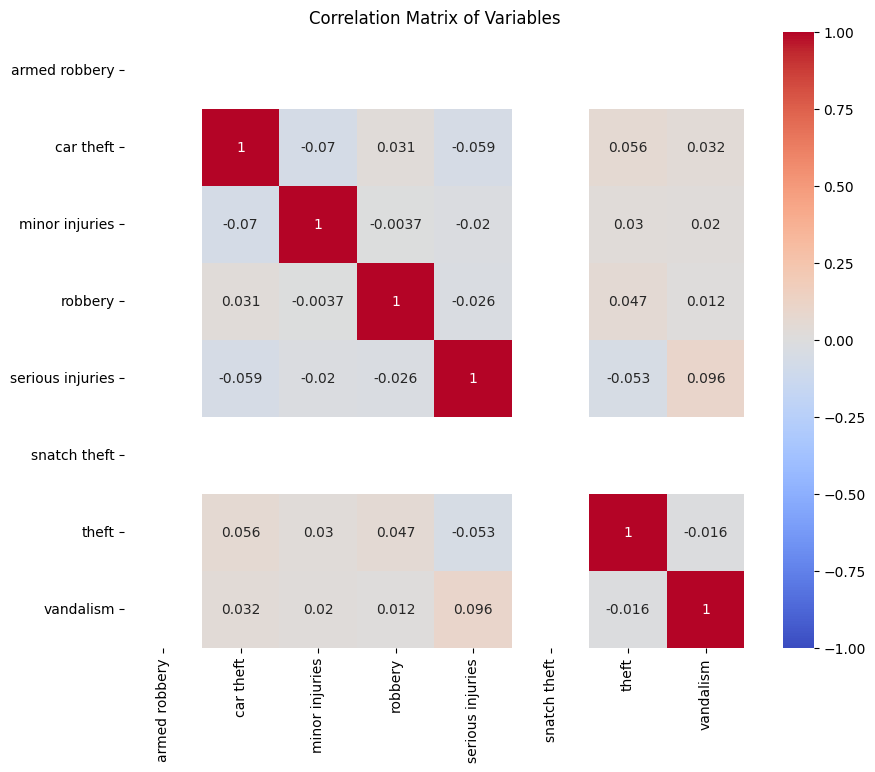

In [8]:
columns_of_interest = df.columns.difference(['name', 'date', 'latitude', 'longitude'])
df_filtered = df[columns_of_interest]

correlation_matrix = df_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Variables')
plt.show()

-----------------------------------------------------------------------------------------------------------------------

### Clarification:

Once again, we observe a lack of correlation, which for those unfamiliar with other areas of research, would imply overlooking the relationship between events, the origin, and the outcome of the demographic project that generated this neighborhood.

-----------------------------------------------------------------------------------------------------------------------

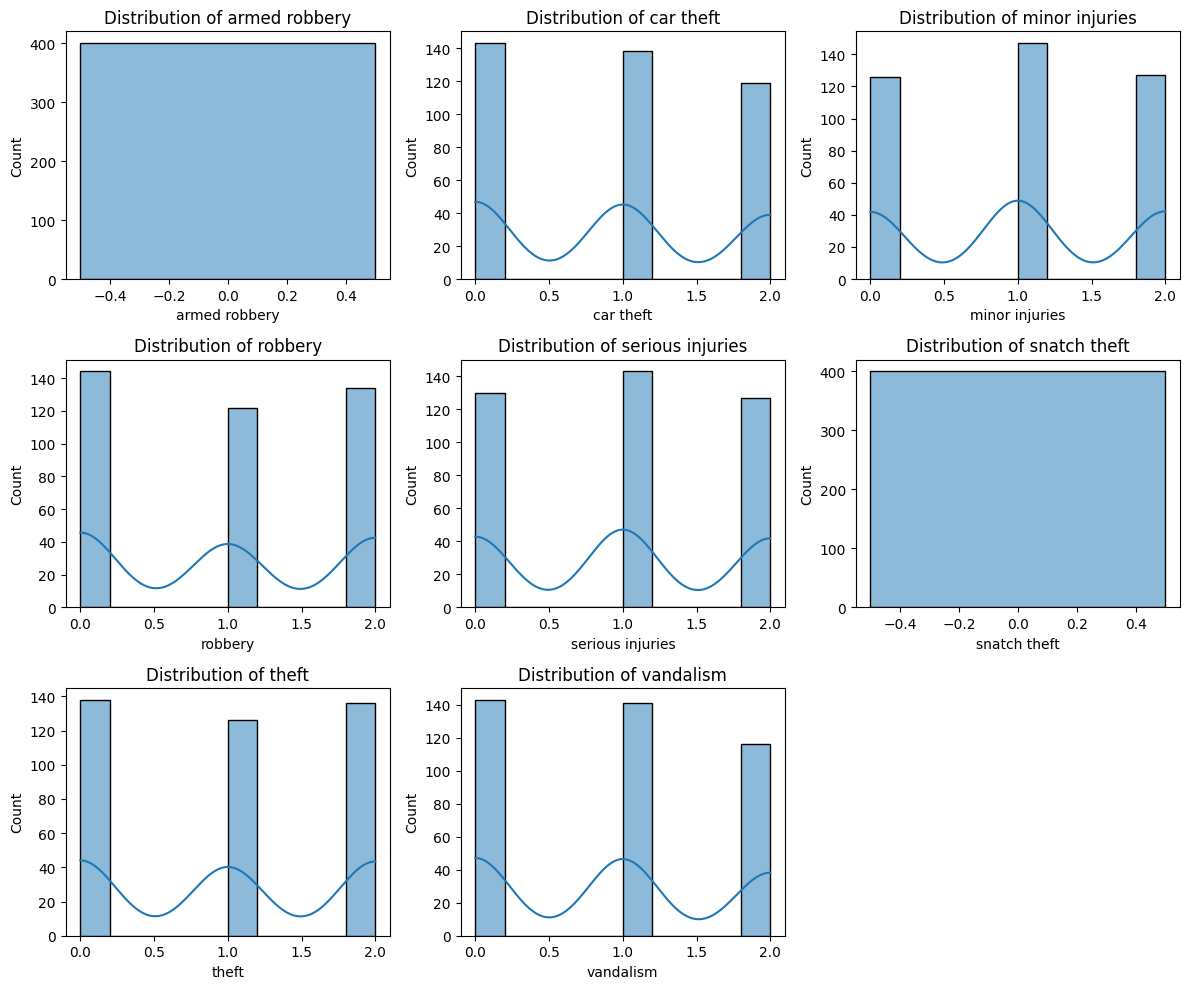

In [9]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------------------------------------------------

Unfortunately, due to legal reasons, I cannot provide the actual data regarding dates, geolocation, and crimes, which were crucial in revealing the issue of overcrowding in the area. Any event that led to the gathering of people triggered acts that undermined coexistence (even if they were not registered as crimes). This initiated an escalation in conflict ranging from property damage to physical disputes between neighbors. Due to the nature of the conflict, events such as armed robberies or group attacks were not recorded, as these conflicts typically involved neighboring families over an extended period (years).

-----------------------------------------------------------------------------------------------------------------------

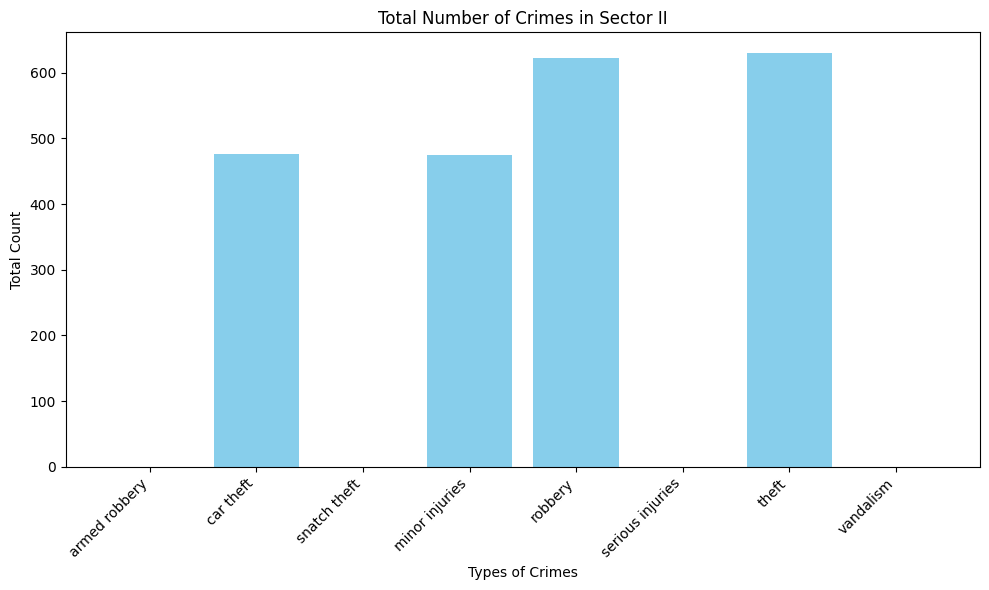

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("crimes_csv/zone_ii_crimes.csv")

crime_totals = df.iloc[:, 1:-1].sum()

crime_names = df.columns[1:-1]

plt.figure(figsize=(10, 6))
plt.bar(crime_names, crime_totals, color="skyblue")
plt.xlabel("Types of Crimes")
plt.ylabel("Total Count")
plt.title("Total Number of Crimes in Sector II")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

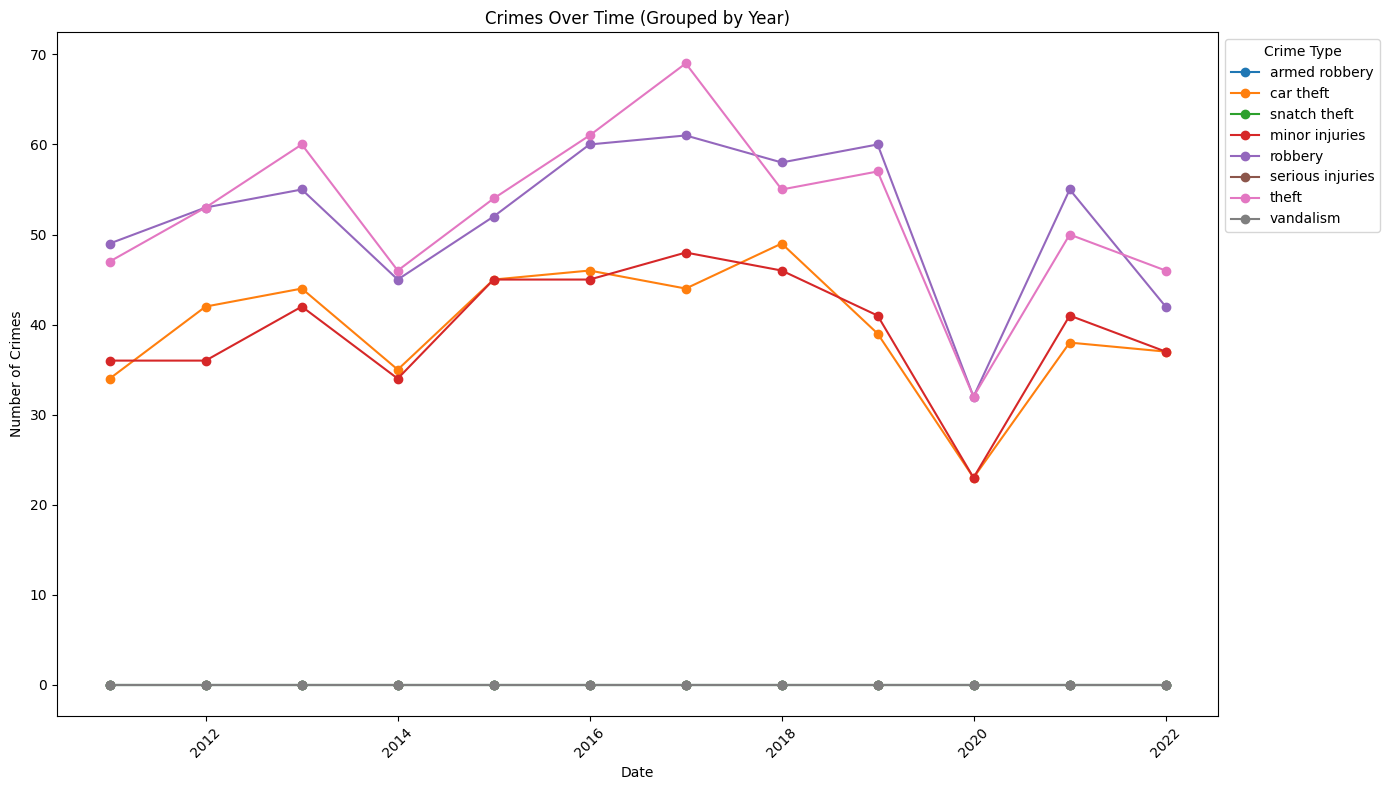

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

df = df.drop(columns=['name'])

crimes_per_year = df.groupby(pd.Grouper(key='date', freq='Y')).sum().reset_index()

fig, ax = plt.subplots(figsize=(14, 8))

for column in crimes_per_year.columns[1:]:
    ax.plot(crimes_per_year['date'], crimes_per_year[column], marker='o', label=column)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')
ax.set_title('Crimes Over Time (Grouped by Year)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Crime Type')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

-----------------------------------------------------------------------------------------------------------------------

A very characteristic aspect of these types of issues is that police presence or other external strategies outside the family nucleus are completely ineffective. As shown in the graph, all reported conflicts tend to escalate, just as all criminal incidents tend to increase. The only thing that has proven to be truly effective is developing mechanisms for healthy interaction among neighbors. Data on conflict de-escalation or cooling off periods are not retained, as once a conflict is resolved, it ceases to be relevant in the context of public safety.

-----------------------------------------------------------------------------------------------------------------------